In [27]:
import os
import torch
from torchvision.models import resnet50
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy.optimize import minimize_scalar
from scipy.misc import derivative
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pylab import rcParams
import pickle
torch.set_printoptions(sci_mode=False)

In [2]:
ckp_path = os.path.join('/home/cvds_lab/mxt-sim/stats/')
os.listdir(ckp_path)

['stats_w2.pkl',
 'stats_w5.pkl',
 'stats_w8.pkl',
 'stats_w3.pkl',
 'stats_w4.pkl']

In [214]:
pkl_w2 = pickle.load(open(os.path.join(ckp_path, 'stats_w2.pkl'), 'rb'))
pkl_w3 = pickle.load(open(os.path.join(ckp_path, 'stats_w3.pkl'), 'rb'))
pkl_w4 = pickle.load(open(os.path.join(ckp_path, 'stats_w4.pkl'), 'rb'))
pkl_w5 = pickle.load(open(os.path.join(ckp_path, 'stats_w5.pkl'), 'rb'))
pkl_w8 = pickle.load(open(os.path.join(ckp_path, 'stats_w8.pkl'), 'rb'))
pkl_w2.keys()

dict_keys(['cv', 'kurtosis', 'm8', 'mean', 'skewness', 'm6', 'var', 'm5', 'm7'])

In [145]:
pkl_w2['mean'].keys()

dict_keys(['layer1.1.relu1', 'layer1.1.relu2', 'layer2.0.relu1', 'layer3.0.relu1', 'layer1.0.relu2', 'layer2.0.relu2', 'layer2.1.relu2', 'layer3.1.relu1', 'layer1.0.relu1', 'layer2.1.relu1', 'layer3.0.relu2'])

In [245]:
def list_mean(l):
    if len(l) == 0:
        return None

    res = l[0].clone()
    for t in l[1:]:
        res += t
    return res / len(l)

def rel_change(p1, p2, stat_name, stat_id):
    t1 = list_mean(p1[stat_name][stat_id])
    t2 = list_mean(p2[stat_name][stat_id])
    p = 1
    return torch.abs(torch.norm(t1, p=p) - torch.norm(t2, p=p)) / torch.norm(t1, p=p)

def rel_change_df(p1, p2):
    df = pd.DataFrame(index=["L{}".format(l) for l in range(len(p1[stats[0]]))], columns=stats)
    for s in stats:
        arr = []
        for id_ in p1[s]:
            arr.append(rel_change(p1, p2, s, id_).item())
        df[s] = arr
    return df

def rel_change_plot(df):
    font = {'weight' : 'normal', 'size': 20, 'weight': 'bold'}
    matplotlib.rc('font', **font)

    ind = np.arange(len(df))    # the x locations for the groups
    width = 0.15

    plt.bar(ind, df['mean'], width)
    plt.bar(ind + width, df['var'], width)
    plt.bar(ind + 2*width, df['skewness'], width)
    plt.bar(ind + 3*width, df['kurtosis'], width)

    plt.ylabel('moments change %', fontsize=25)
    plt.xticks(ind, df.index);
    plt.legend(df.columns, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fancybox=True, shadow=True);

In [180]:
id_ = 'layer1.1.relu1'
s = 'mean'
print(torch.norm(list_mean(pkl_w2[s][id_]), p=1))
print(torch.norm(list_mean(pkl_w3[s][id_]), p=1))
print(torch.norm(list_mean(pkl_w4[s][id_]), p=1))
print(torch.norm(list_mean(pkl_w5[s][id_]), p=1))
print(torch.norm(list_mean(pkl_w8[s][id_]), p=1))

tensor(3.23602, device='cuda:1')
tensor(2.71344, device='cuda:1')
tensor(2.85616, device='cuda:1')
tensor(2.93609, device='cuda:1')
tensor(2.92500, device='cuda:1')


In [126]:
((list_mean(pkl_w2[s][id_]) - list_mean(pkl_w3[s][id_])) / (list_mean(pkl_w2[s][id_]) - list_mean(pkl_w5[s][id_]))).abs().mean()

tensor(0.93973, device='cuda:1')

In [82]:
list_mean(pkl_w2['mean'][id_]) - list_mean(pkl_w4['mean'][id_])

tensor([-0.26728, -0.31166,  0.14922,  0.88064,  0.30296,  0.04707,  0.49154,
         0.37578,  0.53003,  0.48319,  0.28984, -0.34749,  0.03879,  0.45769,
        -0.08725, -0.14651], device='cuda:1')

In [191]:
stats = ['mean', 'var', 'skewness', 'kurtosis', 'm5', 'm6', 'm7', 'm8']
id_ = 'layer1.1.relu2'
for s in stats:
    print("{} change: {:.4f}".format(s, rel_change(pkl_w2, pkl_w3, s, id_).item()))
    
print("\n-------------\n")
for s in stats:
    print("{} change: {:.4f}".format(s, rel_change(pkl_w2, pkl_w4, s, id_).item()))
    
print("\n-------------\n")
for s in stats:
    print("{} change: {:.4f}".format(s, rel_change(pkl_w2, pkl_w5, s, id_).item()))

print("\n-------------\n")
for s in stats:
    print("{} change: {:.4f}".format(s, rel_change(pkl_w2, pkl_w8, s, id_).item()))

mean change: 0.0338
var change: 0.1244
skewness change: 0.0424
kurtosis change: 0.0729
m5 change: 0.1511
m6 change: 0.2649
m7 change: 0.4540
m8 change: 0.7314

-------------

mean change: 0.0215
var change: 0.1117
skewness change: 0.0102
kurtosis change: 0.0221
m5 change: 0.0375
m6 change: 0.0710
m7 change: 0.1309
m8 change: 0.2256

-------------

mean change: 0.0253
var change: 0.1051
skewness change: 0.0047
kurtosis change: 0.0117
m5 change: 0.0177
m6 change: 0.0395
m7 change: 0.0826
m8 change: 0.1552

-------------

mean change: 0.0322
var change: 0.1075
skewness change: 0.0097
kurtosis change: 0.0110
m5 change: 0.0158
m6 change: 0.0312
m7 change: 0.0657
m8 change: 0.1254


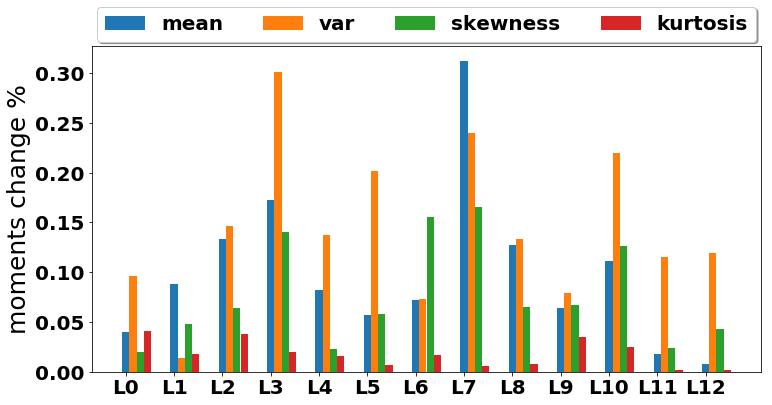

In [263]:
rcParams['figure.figsize'] = 12, 6
df = rel_change_df(pkl_w2, pkl_w3)
rel_change_plot(df)

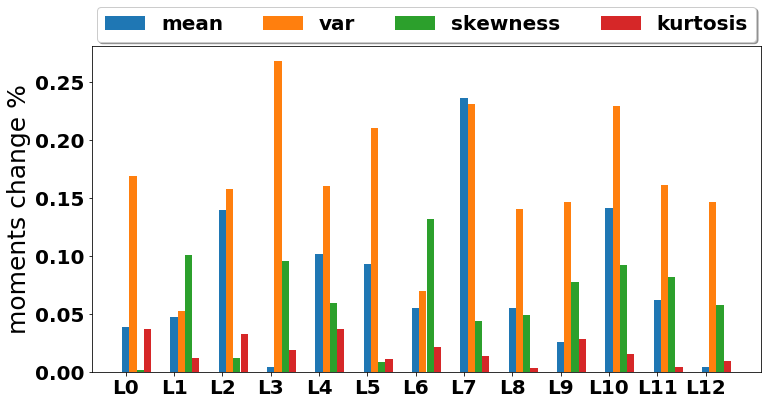

In [264]:
rcParams['figure.figsize'] = 12, 6
df = rel_change_df(pkl_w2, pkl_w4)
rel_change_plot(df)

In [255]:
pkl_w2['kurtosis'].keys()

dict_keys(['layer3.1.conv1', 'layer2.0.conv2', 'layer2.0.conv1', 'layer1.1.conv2', 'layer2.1.conv2', 'layer3.0.downsample.0', 'layer1.0.conv1', 'layer1.0.conv2', 'layer1.1.conv1', 'layer3.0.conv2', 'layer2.0.downsample.0', 'layer2.1.conv1', 'layer3.0.conv1'])

In [266]:
l = 'layer1.1.conv1'
print(torch.norm(list_mean(pkl_w2['kurtosis'][l]), p=1).item())
print(torch.norm(list_mean(pkl_w3['kurtosis'][l]), p=1).item())
print(torch.norm(list_mean(pkl_w4['kurtosis'][l]), p=1).item())

83.77379608154297
84.46076965332031
84.03005981445312


In [259]:
# pkl_w2['kurtosis']

# df = pd.DataFrame(index=["L{}".format(l) for l in range(len(pkl_w2['kurtosis']))], columns=['kutosis'])
# arr = []
# for id_ in pkl_w2['kurtosis']:
#     arr.append(list_mean(pkl_w2['kurtosis'][id_]).item())
# df['kurtosis'] = arr
# df

In [197]:
df24

,mean,var,skewness,kurtosis,m5,m6,m7,m8
L0,0.117386,0.143803,0.034038,0.051966,0.068505,0.069985,0.056823,0.027823
L1,0.021542,0.111707,0.010218,0.022103,0.037544,0.071017,0.130934,0.225557
L2,0.162736,0.028315,0.064048,0.004989,0.075518,0.243867,0.511134,0.902839
L3,0.002038,0.093723,0.073394,0.216835,0.451836,0.822670,1.400561,2.303755
L4,0.054838,0.050922,0.063834,0.449967,1.583829,3.766730,7.460591,13.369462
L5,0.012432,0.088536,0.049801,0.105358,0.160624,0.207967,0.241091,0.265175
L6,0.014357,0.107800,0.014950,0.069261,0.130192,0.231525,0.367360,0.561099
L7,0.106987,0.201684,0.030809,0.090913,0.193394,0.349767,0.572213,0.873887
L8,0.064620,0.158187,0.244326,0.523521,0.856606,1.133679,1.388858,1.652688
L9,0.009911,0.123291,0.019918,0.073631,0.132659,0.189067,0.227556,0.241788


2 bit QAT after conv


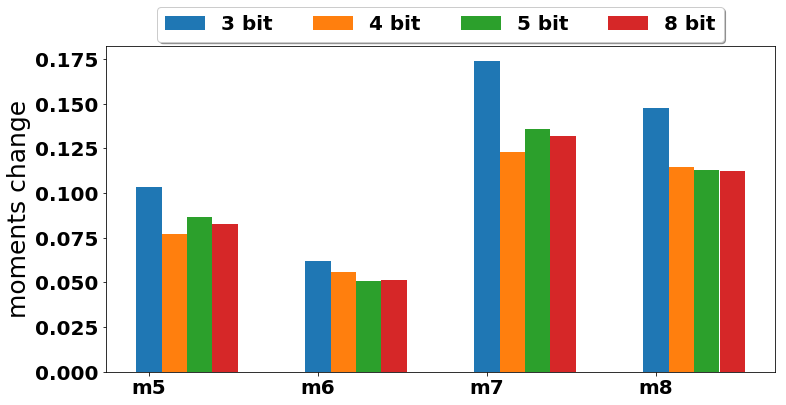

In [237]:
print("2 bit QAT after conv")

stats = ['m5', 'm6', 'm7', 'm8']
# stats = ['mean', 'var', 'skewness', 'kurtosis']
df23 = rel_change_df(pkl_w2, pkl_w3)
df24 = rel_change_df(pkl_w2, pkl_w4)
df25 = rel_change_df(pkl_w2, pkl_w5)
df28 = rel_change_df(pkl_w2, pkl_w8)

change23 = [df23[s].mean() for s in stats]
change24 = [df24[s].mean() for s in stats]
change25 = [df25[s].mean() for s in stats]
change28 = [df28[s].mean() for s in stats]

ind = np.arange(len(change23))
width = 0.15

plt.bar(ind, change23, width)
plt.bar(ind + width, change24, width)
plt.bar(ind + 2*width, change25, width)
plt.bar(ind + 3*width, change28, width)

plt.ylabel('moments change', fontsize=25)
plt.xticks(ind, stats);
plt.legend(['3 bit', '4 bit', '5 bit', '8 bit'], loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fancybox=True, shadow=True);

In [216]:
pkl_w2_relu = pickle.load(open(os.path.join(ckp_path, 'stats_w2_relu.pkl'), 'rb'))
pkl_w3_relu = pickle.load(open(os.path.join(ckp_path, 'stats_w3_relu.pkl'), 'rb'))
pkl_w4_relu = pickle.load(open(os.path.join(ckp_path, 'stats_w4_relu.pkl'), 'rb'))
pkl_w5_relu = pickle.load(open(os.path.join(ckp_path, 'stats_w5_relu.pkl'), 'rb'))
pkl_w8_relu = pickle.load(open(os.path.join(ckp_path, 'stats_w8_relu.pkl'), 'rb'))
pkl_w2_relu.keys()

dict_keys(['skewness', 'cv', 'kurtosis', 'm8', 'mean', 'var', 'm6', 'm5', 'm7'])

2 bit QAT after relu


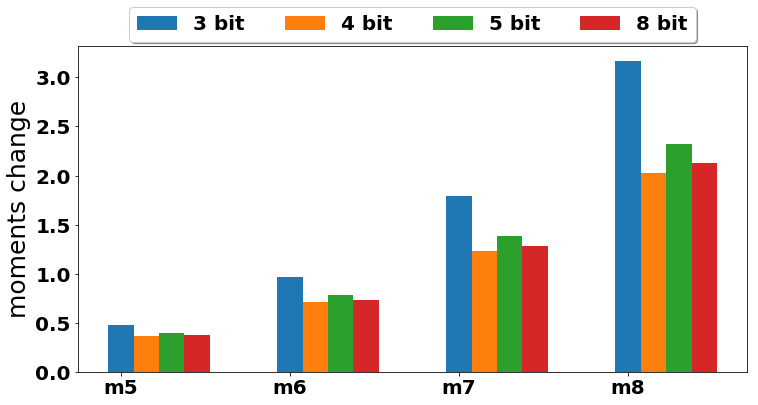

In [267]:
print("2 bit QAT after relu")
rcParams['figure.figsize'] = 12, 6
stats = ['m5', 'm6', 'm7', 'm8']
# stats = ['mean', 'var', 'skewness', 'kurtosis']
df23 = rel_change_df(pkl_w2_relu, pkl_w3_relu)
df24 = rel_change_df(pkl_w2_relu, pkl_w4_relu)
df25 = rel_change_df(pkl_w2_relu, pkl_w5_relu)
df28 = rel_change_df(pkl_w2_relu, pkl_w8_relu)

change23 = [df23[s].mean() for s in stats]
change24 = [df24[s].mean() for s in stats]
change25 = [df25[s].mean() for s in stats]
change28 = [df28[s].mean() for s in stats]

ind = np.arange(len(change23))
width = 0.15

plt.bar(ind, change23, width)
plt.bar(ind + width, change24, width)
plt.bar(ind + 2*width, change25, width)
plt.bar(ind + 3*width, change28, width)

plt.ylabel('moments change', fontsize=25)
plt.xticks(ind, stats);
plt.legend(['3 bit', '4 bit', '5 bit', '8 bit'], loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fancybox=True, shadow=True);

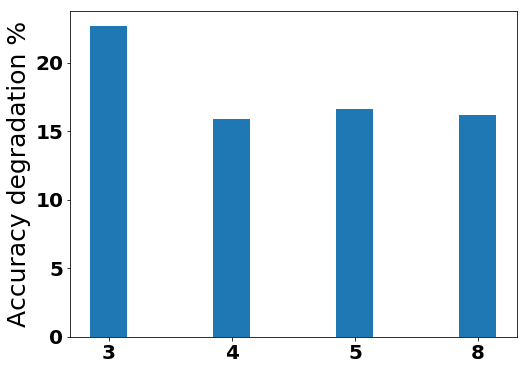

In [232]:
bits = np.array([2,3,4,5,8])
acc = np.array([89.55, 66.89, 73.66, 72.93, 73.35])
degradation = acc[0] - acc[1:]

ind = np.arange(len(bits) - 1)
width = 0.3

rcParams['figure.figsize'] = 8, 6
plt.bar(ind, degradation, width)
plt.ylabel('Accuracy degradation %', fontsize=25)
plt.xticks(ind, bits[1:]);